# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/sdolezel/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [143]:
import pandas as pd
import numpy as np
import ppscore as pps

import warnings
warnings.filterwarnings("ignore")

In [65]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('seaborn')

In [54]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

In [55]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [57]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [83]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


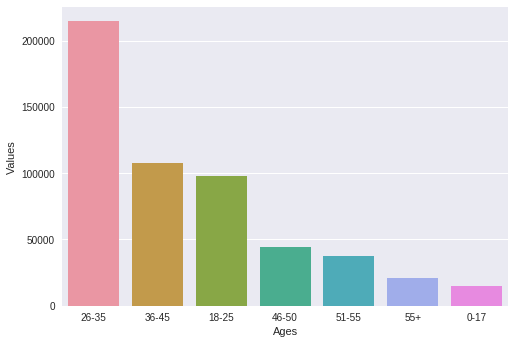

In [93]:
df_age_count = pd.DataFrame(black_friday['Age'].value_counts()).reset_index()
df_age_count.columns = ['Ages', 'Values']

sns.barplot(x='Ages', y='Values', data=df_age_count)
plt.show()

In [96]:
 pd.DataFrame(black_friday['Gender'].value_counts())

,Gender
M,405380
F,132197


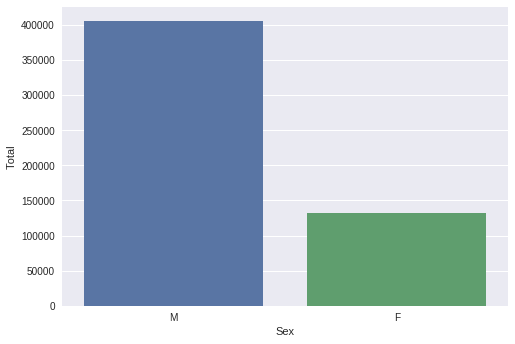

In [101]:
df_sex_count = pd.DataFrame(black_friday['Gender'].value_counts()).reset_index()
df_sex_count.columns = ['Gender', 'Total']
sns.barplot(df_sex_count['Gender'], df_sex_count['Total'])
plt.show()

In [ ]:
#verificando o Valor gasto médio por sexo

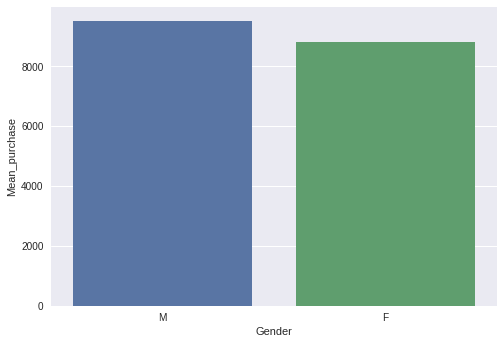

In [134]:
df_sex_purchase_mean = pd.DataFrame(black_friday.groupby('Gender').mean()['Purchase']).reset_index()
df_sex_purchase_mean.columns = ['Gender', 'Mean_purchase']
df_sex_purchase_mean = df_sex_purchase_mean.sort_index(ascending=False)
sns.barplot(nn['Gender'], nn['Mean_purchase'])
plt.show()

In [149]:
ppscore_matrix = pps.matrix(black_friday)


[more about ppscore](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)

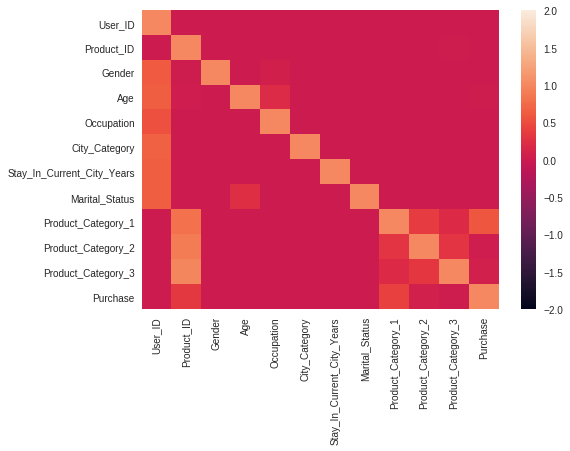

In [146]:
sns.heatmap(ppscore_matrix, vmin=-2, vmax=2)

In [148]:
ppscore_matrix

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.000000,0,0.000588,0.011430,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
Product_ID,0.000000,1.000000,0,0.000000,0.000000,0.0,0.0,0.0,0.005655,7.869115e-03,0.022202,0.004047
Gender,0.621993,0.027462,1,0.000000,0.071066,0.0,0.0,0.0,0.002286,1.700538e-07,0.000000,0.000000
Age,0.642784,0.041754,0,1.000000,0.208908,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.018180
Occupation,0.531411,0.000000,0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
City_Category,0.662058,0.003112,0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
Stay_In_Current_City_Years,0.643125,0.003804,0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
Marital_Status,0.641230,0.000000,0,0.237461,0.000000,0.0,0.0,1.0,0.000000,0.000000e+00,0.000000,0.000000
Product_Category_1,0.000000,0.798687,0,0.000000,0.000000,0.0,0.0,0.0,1.000000,3.601355e-01,0.196249,0.580334
Product_Category_2,0.000000,0.905584,0,0.000000,0.000000,0.0,0.0,0.0,0.310037,1.000000e+00,0.307914,0.032870


## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [70]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [71]:
def q2():
    # Retorne aqui o resultado da questão 2.
    female = black_friday[black_friday['Gender'] == 'F']
    female26_35 = female[female['Age'] == '26-35']
    return female26_35.shape[0]

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [72]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return len(black_friday['User_ID'].unique())

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [73]:
def q4():
    # Retorne aqui o resultado da questão 4.
    df_info_types = pd.DataFrame(black_friday.dtypes).reset_index()
    df_info_types.columns = ['columns', 'types']
    return len(df_info_types['types'].unique())

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [74]:
def q5():
    # Retorne aqui o resultado da questão 5.
    nulls = sum((black_friday['Product_Category_2'].isnull()) | (black_friday['Product_Category_3'].isnull())) 
    pct = nulls / black_friday.shape[0]
    return pct

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [75]:
nulos = pd.DataFrame(black_friday.isnull().sum()).reset_index()
nulos.columns = ['colunas', 'valores_nulos']
int(nulos['valores_nulos'].sort_values(ascending=False).head(1).values)

373299

In [76]:
def q6():
    # Retorne aqui o resultado da questão 6.
    pass

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [77]:
def q7():
    # Retorne aqui o resultado da questão 7.
    nulos = pd.DataFrame(black_friday.isnull().sum()).reset_index()
    nulos.columns = ['colunas', 'valores_nulos']
    maior_nulos = int(nulos['valores_nulos'].sort_values(ascending=False).head(1).values)
    return maior_nulos

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [78]:
def q8():
    # Retorne aqui o resultado da questão 8.
    purchase_norm = (black_friday['Purchase'] - black_friday['Purchase'].min())/(black_friday['Purchase'].max() - black_friday['Purchase'].min())
    return np.mean(purchase_norm)

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [80]:
def q9():
    # Retorne aqui o resultado da questão 9.
    purch_stard = (black_friday['Purchase'] - black_friday['Purchase'].mean()) / black_friday['Purchase'].std()
    return(sum([1 if i > -1 and i < 1 else 0 for i in purch_stard]))

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [81]:
def q10():
    # Retorne aqui o resultado da questão 10.
    cat2 = black_friday['Product_Category_2'].isnull()
    cat3 = black_friday['Product_Category_3'].isnull()
    return(cat2[cat2 == True].equals(cat3[cat2 == True]))
    pass